<a href="https://colab.research.google.com/github/ajayykumarr/main-project-1/blob/main/Face_mask_Detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import classification_report, accuracy_score
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Mask-Dataset/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Mask-Dataset/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1325 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(64,64,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(64, (3,3),activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
model.compile( optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [ ]:
model.fit(x= training_set, validation_data= test_set, epochs=20)

Epoch 1/20
42/42 [==============================] - 13s 260ms/step - loss: 0.2425 - accuracy: 0.9087 - val_loss: 0.6427 - val_accuracy: 0.5361
Epoch 2/20
42/42 [==============================] - 10s 222ms/step - loss: 0.1511 - accuracy: 0.9472 - val_loss: 2.3866 - val_accuracy: 0.5000
Epoch 3/20
42/42 [==============================] - 10s 248ms/step - loss: 0.0969 - accuracy: 0.9706 - val_loss: 2.9406 - val_accuracy: 0.5000
Epoch 4/20
42/42 [==============================] - 11s 255ms/step - loss: 0.0792 - accuracy: 0.9683 - val_loss: 3.8157 - val_accuracy: 0.5000
Epoch 5/20
42/42 [==============================] - 11s 256ms/step - loss: 0.1100 - accuracy: 0.9600 - val_loss: 2.4154 - val_accuracy: 0.5000
Epoch 6/20
42/42 [==============================] - 10s 243ms/step - loss: 0.0628 - accuracy: 0.9774 - val_loss: 2.6656 - val_accuracy: 0.5000
Epoch 7/20
42/42 [==============================] - 11s 247ms/step - loss: 0.0567 - accuracy: 0.9774 - val_loss: 2.5226 - val_accuracy: 0.5000

1/1 [==============================] - 0s 51ms/step
no mask


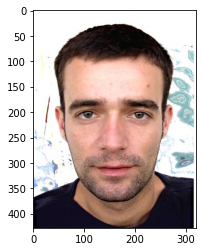

In [ ]:
import cv2
img= cv2.imread('/content/drive/MyDrive/Mask-Dataset/train/without_mask/221.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = plt.imshow(img)



import numpy as np
test_image = tf.keras.utils.load_img('/content/drive/MyDrive/Mask-Dataset/train/without_mask/221.jpg', target_size = (64,64))
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
train_generator.class_indices
if result[0][0] == 1:
  prediction = 'no mask'
else:
  prediction = 'mask is there'

print(prediction)

1/1 [==============================] - 0s 20ms/step
mask is there


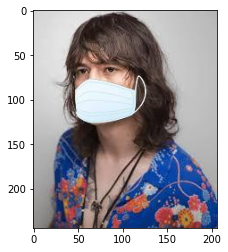

In [ ]:
import cv2
img= cv2.imread('/content/drive/MyDrive/Mask-Dataset/train/with_mask/155-with-mask.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = plt.imshow(img)



import numpy as np
test_image = tf.keras.utils.load_img('/content/drive/MyDrive/Mask-Dataset/train/with_mask/155-with-mask.jpg', target_size = (64,64))
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
train_generator.class_indices
if result[0][0] == 1:
  prediction = 'no mask'
else:
  prediction = 'mask is there'

print(prediction)

Text(0.5, 1.0, 'Training and validation loss')

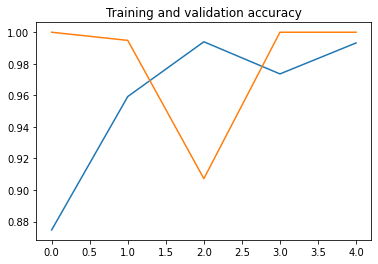

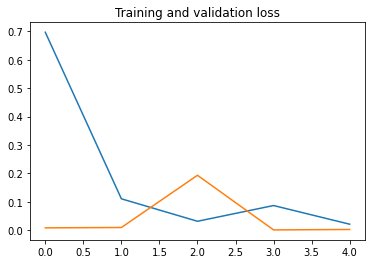

In [ ]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) 

plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )